<a href="https://colab.research.google.com/github/TrovaBruno/A3_Inteligencia_Artificial/blob/main/a3_atualizado1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
td = pd.read_csv('UCL_AllTime_Performance_Table_1.csv', encoding='latin1')


In [ ]:
td.columns

Index(['#;Team;M.;W;D;L;goals;Dif;Pt.'], dtype='object')

In [ ]:
td.head()

,#;Team;M.;W;D;L;goals;Dif;Pt.
1;Real Madrid;491;294;85;112;1079,542;533;533
2;Bayern Munich;392;233;78;81;822,391;427;427
3;FC Barcelona;337;195;75;67;671,347;319;319
4;Manchester United;285;151;67;67;512,290;224;224
5;Juventus;301;153;69;79;475,302;171;171


In [ ]:
td.columns[0]

'Team'

In [ ]:
td = pd.read_csv('UCL_AllTime_Performance_Table_1.csv', sep=';', encoding='latin1')

In [ ]:
td.drop(['#'],axis=1,inplace=True)

In [ ]:
print(td.dtypes)

Team     object
M.        int64
W         int64
D         int64
L         int64
goals    object
Dif       int64
Pt.       int64
dtype: object


In [ ]:
td[['goals_marcados', 'goals_sofridos']] = td['goals'].str.split(', ', expand=True)

In [ ]:
td.head()

,Team,M.,W,D,L,goals,Dif,Pt.,goals_marcados,goals_sofridos
0,Real Madrid,491,294,85,112,"1079, 542",533,533,1079,542
1,Bayern Munich,392,233,78,81,"822, 391",427,427,822,391
2,FC Barcelona,337,195,75,67,"671, 347",319,319,671,347
3,Manchester United,285,151,67,67,"512, 290",224,224,512,290
4,Juventus,301,153,69,79,"475, 302",171,171,475,302


In [ ]:
td.columns

Index(['Team', 'M.', 'W', 'D', 'L', 'goals', 'Dif', 'Pt.', 'goals_marcados',
       'goals_sofridos'],
      dtype='object')

In [ ]:
colunas_para_remover = [5, 6, 10, 11]

In [ ]:
td.head(50)

,Team,M.,W,D,L,goals,Dif,Pt.,goals_marcados,goals_sofridos
0,Real Madrid,491,294,85,112,"1079, 542",533,533,1079,542
1,Bayern Munich,392,233,78,81,"822, 391",427,427,822,391
2,FC Barcelona,337,195,75,67,"671, 347",319,319,671,347
3,Manchester United,285,151,67,67,"512, 290",224,224,512,290
4,Juventus,301,153,69,79,"475, 302",171,171,475,302
5,AC Milan,261,122,68,71,"414, 260",171,171,414,260
6,Liverpool FC,234,132,48,54,"442, 219",214,214,442,219
7,FC Porto,257,115,55,87,"369, 298",86,86,369,298
8,SL Benfica,270,117,62,91,"438, 325",114,114,438,325
9,Chelsea FC,197,101,52,44,"334, 181",153,153,334,181


In [ ]:
td.isnull().sum()

,0
Team,0
M.,0
W,0
D,0
L,0
goals,0
Dif,0
Pt.,0
goals_marcados,0
goals_sofridos,304


In [ ]:
td  = td.dropna(subset=['goals_sofridos'])

In [ ]:
td.isnull().sum()

,0
Team,0
M.,0
W,0
D,0
L,0
goals,0
Dif,0
Pt.,0
goals_marcados,0
goals_sofridos,0


In [ ]:
num_linhas = td.shape[0]
print(f"Número de linhas após as exclusões: {num_linhas}")

Número de linhas após as exclusões: 50


In [ ]:
td['goals_marcados'] = pd.to_numeric(td['goals_marcados'], errors='coerce')
td['goals_sofridos'] = pd.to_numeric(td['goals_sofridos'], errors='coerce')

grouped = td.groupby('Team')[['goals_marcados', 'goals_sofridos']].mean()

print(grouped)

                     goals_marcados  goals_sofridos
Team                                               
AC Milan                      414.0           260.0
AC Sparta Praha               129.0           154.0
AFC Ajax                      344.0           239.0
AS Monaco                     148.0           138.0
AS Roma                       157.0           157.0
Arsenal FC                    324.0           224.0
Atletico Madrid               245.0           171.0
Bayer Leverkusen              152.0           178.0
Bayern Munich                 822.0           391.0
Borussia Dortmund             307.0           227.0
CSKA Moskva                    87.0           134.0
CSKA Sofia                    118.0           124.0
Celtic FC                     222.0           228.0
Chelsea FC                    334.0           181.0
Club Brugge KV                109.0           145.0
Crvena Zvezda                 205.0           182.0
Deportivo La Corunã            74.0            79.0
Dinamo Kiev 

In [ ]:
td['avg_goals_marcados'] = td['goals_marcados'] / td['M.']
td['avg_goals_sofridos'] = td['goals_sofridos'] / td['M.']

# Agrupando por time e calculando as médias
grouped = td.groupby('Team')[['avg_goals_marcados', 'avg_goals_sofridos']].mean()

print(grouped)

                     avg_goals_marcados  avg_goals_sofridos
Team                                                       
AC Milan                       1.586207            0.996169
AC Sparta Praha                1.264706            1.509804
AFC Ajax                       1.600000            1.111628
AS Monaco                      1.510204            1.408163
AS Roma                        1.440367            1.440367
Arsenal FC                     1.611940            1.114428
Atletico Madrid                1.441176            1.005882
Bayer Leverkusen               1.369369            1.603604
Bayern Munich                  2.096939            0.997449
Borussia Dortmund              1.696133            1.254144
CSKA Moskva                    1.060976            1.634146
CSKA Sofia                     1.404762            1.476190
Celtic FC                      1.387500            1.425000
Chelsea FC                     1.695431            0.918782
Club Brugge KV                 1.123711 

In [ ]:
grande_quantidade_goals = grouped[grouped['avg_goals_marcados'] > 2]
print(grande_quantidade_goals)

                 avg_goals_marcados  avg_goals_sofridos
Team                                                   
Bayern Munich              2.096939            0.997449
Manchester City            2.114504            1.129771
Olympique Lyon             2.018868            1.556604
Real Madrid                2.197556            1.103870


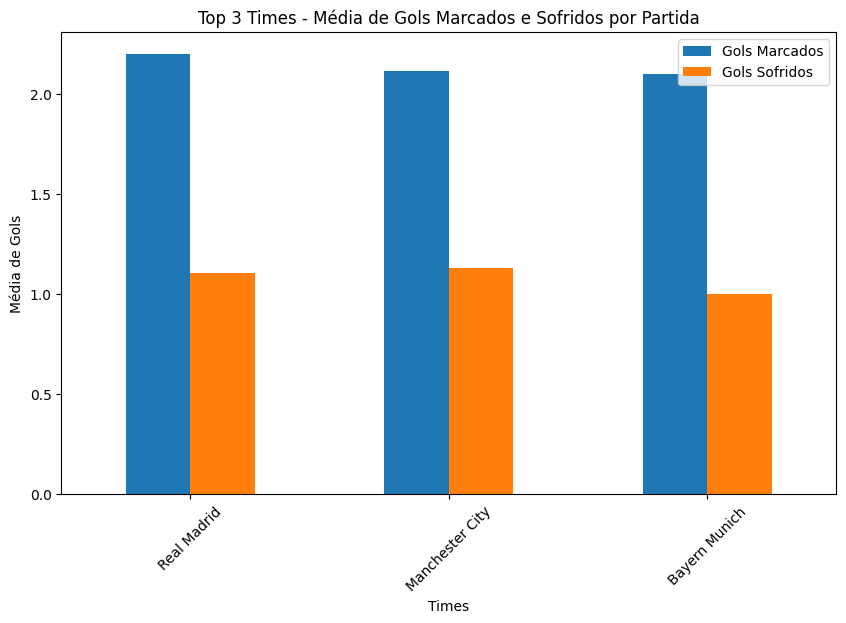

In [ ]:
# Ordenar os times pela média de gols marcados e selecionar os top 3
top_3_teams = grouped.nlargest(3, 'avg_goals_marcados')

# Criar o gráfico de barras
top_3_teams[['avg_goals_marcados', 'avg_goals_sofridos']].plot(kind='bar', figsize=(10, 6))

plt.title('Top 3 Times - Média de Gols Marcados e Sofridos por Partida')
plt.xlabel('Times')
plt.ylabel('Média de Gols')
plt.xticks(rotation=45)
plt.legend(['Gols Marcados', 'Gols Sofridos'])
plt.show()

                          M.         W         D         L       Dif  \
M.                  1.000000  0.976106  0.958617  0.820565  0.862193   
W                   0.976106  1.000000  0.915308  0.689073  0.946840   
D                   0.958617  0.915308  1.000000  0.768657  0.790397   
L                   0.820565  0.689073  0.768657  1.000000  0.449370   
Dif                 0.862193  0.946840  0.790397  0.449370  1.000000   
Pt.                 0.862193  0.946840  0.790397  0.449370  1.000000   
goals_marcados      0.967950  0.992919  0.887848  0.697945  0.947989   
goals_sofridos      0.941563  0.873804  0.865754  0.932174  0.697004   
avg_goals_marcados  0.496096  0.631167  0.384060  0.084826  0.787849   
avg_goals_sofridos -0.626977 -0.679563 -0.704931 -0.232576 -0.725256   

                         Pt.  goals_marcados  goals_sofridos  \
M.                  0.862193        0.967950        0.941563   
W                   0.946840        0.992919        0.873804   
D              

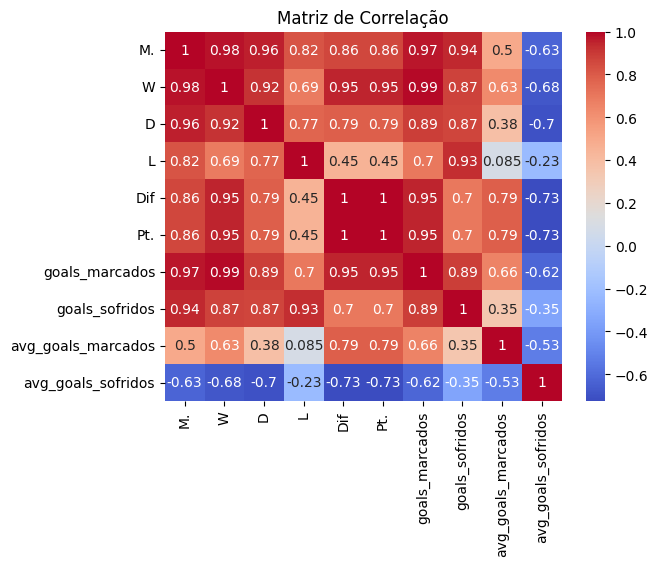

In [ ]:
# Selecionar apenas colunas numéricas para o cálculo da correlação
numerical_cols = td.select_dtypes(include=np.number).columns
correlation_matrix = td[numerical_cols].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Visualizar a matriz de correlação usando um heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Interpretação: M (Partidas Jogadas): Forte correlação com vitórias (W), empates (D), derrotas (L) e gols marcados. Menor correlação com pontos (Pt) e gols sofridos (goals_sofridos).

W (Vitórias): Altíssima correlação com partidas jogadas (M), e gols marcados. Correlação moderada com derrotas (L) e pontos (Pt).

D (Empates): Alta correlação com partidas jogadas (M), vitórias (W), e derrotas (L). Correlação mais fraca com pontos (Pt).

L (Derrotas): Forte correlação com partidas jogadas (M), vitórias (W) e empates (D). Correlação fraca com pontos (Pt) e gols sofridos.

Pt (Pontos): Moderada correlação com vitórias (W) e gols marcados (goals_marcados). Correlação baixa com derrotas (L) e gols sofridos (goals_sofridos).

goals_marcados (Gols Marcados): Altíssima correlação com vitórias (W), partidas jogadas (M) e moderada com pontos (Pt). Menor correlação com gols sofridos (goals_sofridos).

goals_sofridos (Gols Sofridos): Correlação mais baixa com todas as outras variáveis, especialmente pontos (Pt).

Top 3 times que menos sofrem gols:
              avg_goals_marcados  avg_goals_sofridos
Team                                                
Chelsea FC              1.695431            0.918782
Liverpool FC            1.888889            0.935897
Inter Milan             1.396135            0.995169


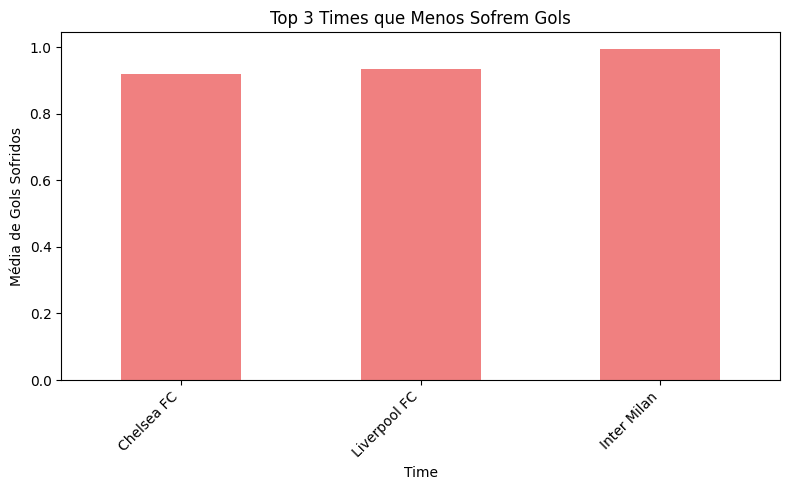

In [ ]:
# Seleciona o top 3 times que menos sofrem gols
top_3_menor_goals_sofridos = grouped.nsmallest(3, 'avg_goals_sofridos')

# Exibe os resultados no console
print("Top 3 times que menos sofrem gols:")
print(top_3_menor_goals_sofridos)

# Cria um gráfico de barras para o top 3 times que menos sofrem gols
plt.figure(figsize=(8, 5))
top_3_menor_goals_sofridos['avg_goals_sofridos'].plot(kind='bar', color='lightcoral')
plt.title('Top 3 Times que Menos Sofrem Gols')
plt.xlabel('Time')
plt.ylabel('Média de Gols Sofridos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta o layout para evitar cortes nas labels

# Exibe o gráfico
plt.show()

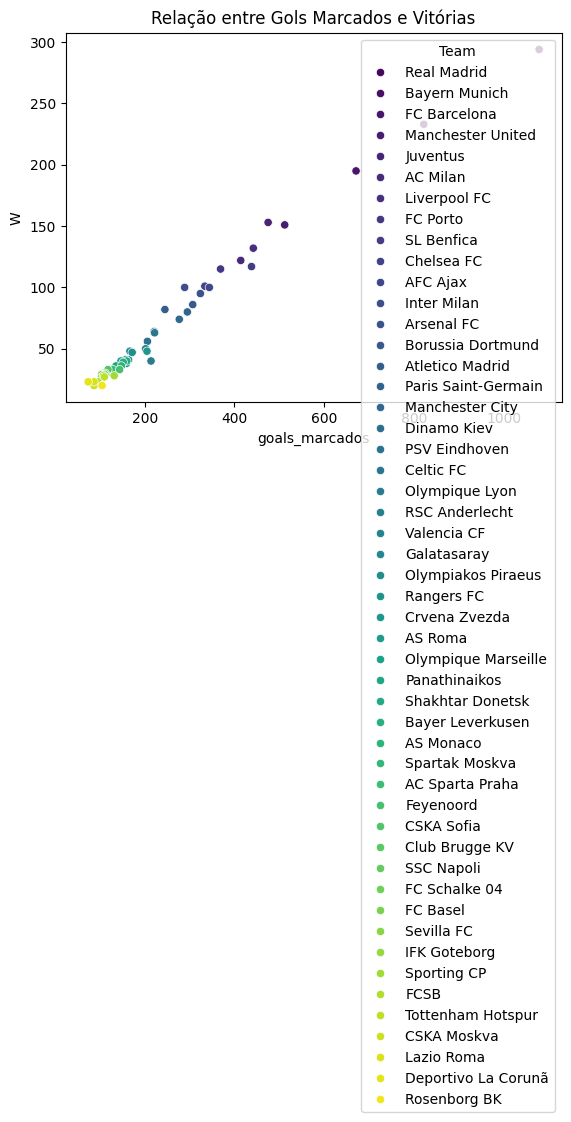

In [ ]:
sns.scatterplot(data=td, x='goals_marcados', y='W', hue='Team', palette='viridis')
plt.title("Relação entre Gols Marcados e Vitórias")
plt.show()

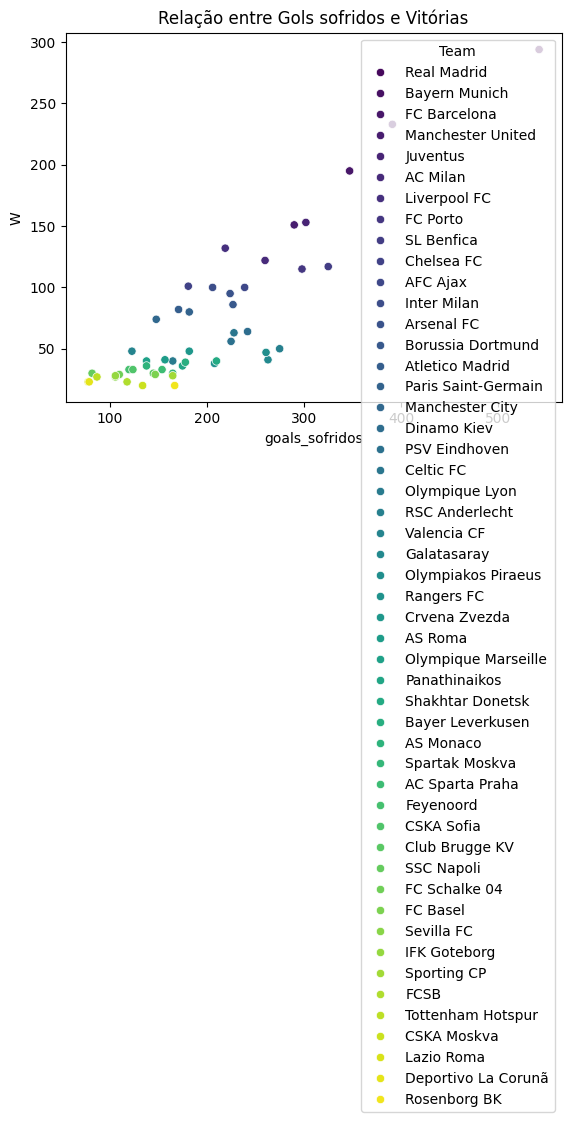

In [ ]:
sns.scatterplot(data=td, x='goals_sofridos', y='W', hue='Team', palette='viridis')
plt.title("Relação entre Gols sofridos e Vitórias")
plt.show()

In [ ]:
features = td[['goals_marcados', 'goals_sofridos', 'W', 'L']]
##A variável features irá armazenar um novo DataFrame contendo apenas as colunas que selecionamos: 'goals_marcados', 'goals_sofridos', 'W' e 'L'.

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

##Essas linhas de código preparam os dados para serem usados em algoritmos de Machine Learning

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

    ##Este código testa o algoritmo K-Means com diferentes números de clusters (de 1 a 10) e calcula a inércia para cada um deles. Esses valores de inércia serão usados posteriormente para determinar o número ideal de clusters, geralmente através do método do "cotovelo"

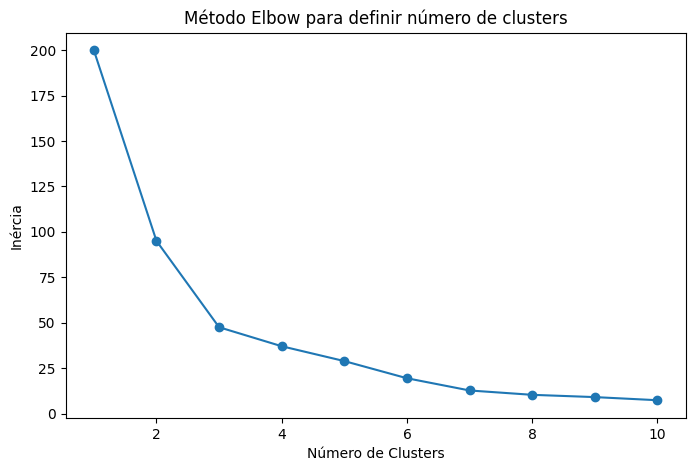

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow para definir número de clusters')
plt.show()

##O gráfico gerado por este código é fundamental para a aplicação do Método do Cotovelo. A inércia representa a soma das distâncias quadradas entre cada ponto de dados e o centro do cluster a que pertence. O objetivo é encontrar um número de clusters onde a inércia começa a diminuir de forma menos significativa, criando uma "dobra" no gráfico, similar a um cotovelo.

In [ ]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
td['Cluster'] = kmeans.fit_predict(scaled_features)

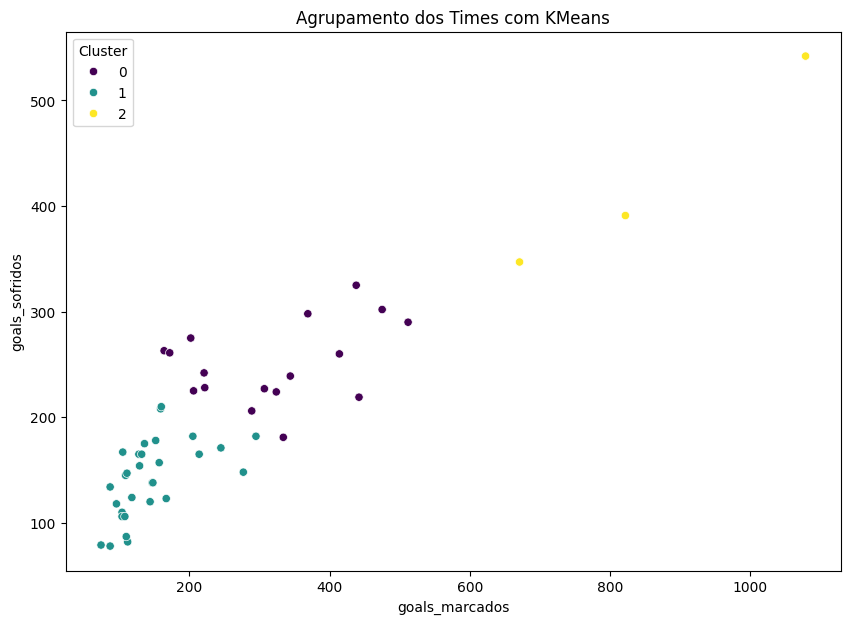

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=td, x='goals_marcados', y='goals_sofridos', hue='Cluster', palette='viridis')
plt.title("Agrupamento dos Times com KMeans")
plt.show()

In [ ]:
# Seleciona apenas as colunas numéricas
colunas_numericas = td.select_dtypes(include=['number']).columns

# Calcula a média apenas para as colunas numéricas
cluster_summary = td.groupby('Cluster')[colunas_numericas].mean()
print(cluster_summary)

                 M.           W          D          L         Dif         Pt.  \
Cluster                                                                         
0        211.529412   93.705882  48.352941  69.470588   70.529412   70.529412   
1         97.966667   36.933333  21.933333  38.966667    3.400000    3.400000   
2        406.666667  240.666667  79.333333  86.666667  426.333333  426.333333   

         goals_marcados  goals_sofridos  avg_goals_marcados  \
Cluster                                                       
0            319.705882      250.882353            1.477540   
1            144.000000      142.066667            1.460499   
2            857.333333      426.666667            2.095198   

         avg_goals_sofridos  Cluster  
Cluster                               
0                  1.226125      0.0  
1                  1.468424      1.0  
2                  1.043664      2.0  


Cluster 0: Times medianos, com algumas vitórias, mas defesa vulnerável. Cluster 1: Times bons, equilibrados entre ataque e defesa. Cluster 2: Times de elite, com alta eficiência tanto no ataque quanto na defesa. Estes padrões podem ajudar a identificar que o sucesso na UCL está correlacionado com um alto número de vitórias, eficiência no ataque, e uma defesa sólida que sofre poucos gols (como observado especialmente no Cluster 2).

In [ ]:
times_cluster_2 = td[td['Cluster'] == 2] # Alterado o nome da variável para times_cluster_1
print("\nTimes no Cluster 2:")
print(times_cluster_2[['Team', 'Cluster']]) # Agora usando o nome correto da variável


Times no Cluster 2:
            Team  Cluster
0    Real Madrid        2
1  Bayern Munich        2
2   FC Barcelona        2


In [ ]:
times_cluster_1 = td[td['Cluster'] == 1]
print("Times no Cluster 1:")
print(times_cluster_1[['Team', 'Cluster']])

Times no Cluster 1:
                   Team  Cluster
14      Atletico Madrid        1
15  Paris Saint-Germain        1
16      Manchester City        1
20       Olympique Lyon        1
22          Valencia CF        1
25           Rangers FC        1
26        Crvena Zvezda        1
27              AS Roma        1
28  Olympique Marseille        1
29        Panathinaikos        1
30     Shakhtar Donetsk        1
31     Bayer Leverkusen        1
32            AS Monaco        1
33       Spartak Moskva        1
34      AC Sparta Praha        1
35            Feyenoord        1
36           CSKA Sofia        1
37       Club Brugge KV        1
38           SSC Napoli        1
39        FC Schalke 04        1
40             FC Basel        1
41           Sevilla FC        1
42         IFK Goteborg        1
43          Sporting CP        1
44                 FCSB        1
45    Tottenham Hotspur        1
46          CSKA Moskva        1
47           Lazio Roma        1
48  Deportivo La Corunã

In [ ]:
times_cluster_0 = td[td['Cluster'] == 0]
print("Times no Cluster 0:")
print(times_cluster_0[['Team', 'Cluster']])

Times no Cluster 0:
                  Team  Cluster
3    Manchester United        0
4             Juventus        0
5             AC Milan        0
6         Liverpool FC        0
7             FC Porto        0
8           SL Benfica        0
9           Chelsea FC        0
10            AFC Ajax        0
11         Inter Milan        0
12          Arsenal FC        0
13   Borussia Dortmund        0
17         Dinamo Kiev        0
18       PSV Eindhoven        0
19           Celtic FC        0
21      RSC Anderlecht        0
23         Galatasaray        0
24  Olympiakos Piraeus        0


In [ ]:
champions = [
    "Real Madrid", "AC Milan", "Liverpool FC", "Manchester United", "Manchester City",
    "FC Barcelona", "Bayern Munich", "FC Porto", "AFC Ajax", "SL Benfica", "Celtic FC",
    "Inter Milan", "Feyenoord", "PSV Eindhoven",
    "Olympique Marseille", "Borussia Dortmund", "Chelsea FC", "Juventus"
]

In [ ]:
def is_champion(team):
    if team in champions:
        return 1
    else:
        return 0

In [ ]:
td['Champion'] = td['Team'].apply(is_champion)

In [ ]:
td.head(20)

,Team,M.,W,D,L,goals,Dif,Pt.,goals_marcados,goals_sofridos,avg_goals_marcados,avg_goals_sofridos,Cluster,Champion
0,Real Madrid,491,294,85,112,"1079, 542",533,533,1079,542,2.197556,1.103870,2,1
1,Bayern Munich,392,233,78,81,"822, 391",427,427,822,391,2.096939,0.997449,2,1
2,FC Barcelona,337,195,75,67,"671, 347",319,319,671,347,1.991098,1.029674,2,1
3,Manchester United,285,151,67,67,"512, 290",224,224,512,290,1.796491,1.017544,0,1
4,Juventus,301,153,69,79,"475, 302",171,171,475,302,1.578073,1.003322,0,1
5,AC Milan,261,122,68,71,"414, 260",171,171,414,260,1.586207,0.996169,0,1
6,Liverpool FC,234,132,48,54,"442, 219",214,214,442,219,1.888889,0.935897,0,1
7,FC Porto,257,115,55,87,"369, 298",86,86,369,298,1.435798,1.159533,0,1
8,SL Benfica,270,117,62,91,"438, 325",114,114,438,325,1.622222,1.203704,0,1
9,Chelsea FC,197,101,52,44,"334, 181",153,153,334,181,1.695431,0.918782,0,1


In [ ]:
print(td.columns)

Index(['Team', 'M.', 'W', 'D', 'L', 'Pt.', 'goals_marcados', 'goals_sofridos',
       'avg_goals_marcados', 'avg_goals_sofridos', 'Cluster', 'Champion'],
      dtype='object')


In [ ]:
td = td.drop(columns=['goals', 'Dif'])

In [ ]:
X = td.drop(['Champion', 'Team'], axis=1)
y = td['Champion']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

Acurácia: 80.00%


In [ ]:
previsoes = model.predict(X)
resultados = pd.DataFrame({'Team': td['Team'], 'Prediction': previsoes})
print(resultados)

                   Team  Prediction
0           Real Madrid           1
1         Bayern Munich           1
2          FC Barcelona           1
3     Manchester United           1
4              Juventus           1
5              AC Milan           1
6          Liverpool FC           1
7              FC Porto           1
8            SL Benfica           1
9            Chelsea FC           1
10             AFC Ajax           1
11          Inter Milan           1
12           Arsenal FC           1
13    Borussia Dortmund           1
14      Atletico Madrid           0
15  Paris Saint-Germain           0
16      Manchester City           1
17          Dinamo Kiev           1
18        PSV Eindhoven           1
19            Celtic FC           0
20       Olympique Lyon           0
21       RSC Anderlecht           0
22          Valencia CF           0
23          Galatasaray           0
24   Olympiakos Piraeus           0
25           Rangers FC           0
26        Crvena Zvezda     

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Calculando o R²
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

Coeficiente de Determinação (R²): 0.10


In [ ]:
correlacao = np.corrcoef(y_test, y_pred)[0, 1]
print(f'Correlação: {correlacao:.2f}')

Correlação: 0.58


In [ ]:
from sklearn.metrics import recall_score
# Calculando o recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')


Recall: 0.80


In [ ]:
from sklearn.metrics import precision_score
# Calculando a precisão
precision = precision_score(y_test, y_pred)
print(f'Precisão: {precision:.2f}')

Precisão: 0.67


<ipython-input-59-ca5109b081ab>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Prediction', data=resultados, palette='viridis')


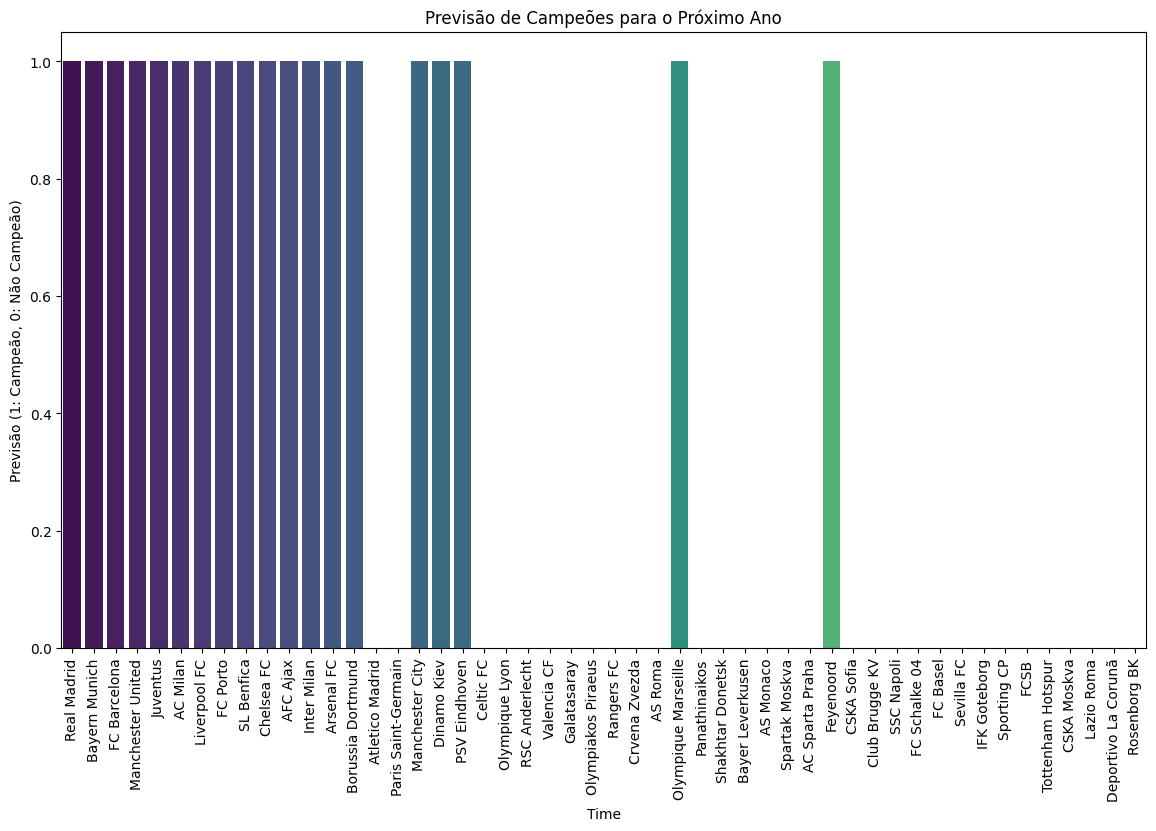

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de resultados fornecidos
resultados = pd.DataFrame({
    'Team': ['Real Madrid', 'Bayern Munich', 'FC Barcelona', 'Manchester United', 'Juventus', 'AC Milan',
             'Liverpool FC', 'FC Porto', 'SL Benfica', 'Chelsea FC', 'AFC Ajax', 'Inter Milan',
             'Arsenal FC', 'Borussia Dortmund', 'Atletico Madrid', 'Paris Saint-Germain', 'Manchester City',
             'Dinamo Kiev', 'PSV Eindhoven', 'Celtic FC', 'Olympique Lyon', 'RSC Anderlecht',
             'Valencia CF', 'Galatasaray', 'Olympiakos Piraeus', 'Rangers FC', 'Crvena Zvezda',
             'AS Roma', 'Olympique Marseille', 'Panathinaikos', 'Shakhtar Donetsk', 'Bayer Leverkusen',
             'AS Monaco', 'Spartak Moskva', 'AC Sparta Praha', 'Feyenoord', 'CSKA Sofia', 'Club Brugge KV',
             'SSC Napoli', 'FC Schalke 04', 'FC Basel', 'Sevilla FC', 'IFK Goteborg', 'Sporting CP',
             'FCSB', 'Tottenham Hotspur', 'CSKA Moskva', 'Lazio Roma', 'Deportivo La Corunã', 'Rosenborg BK'],
    'Prediction': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
})

# Criar gráfico de barras para visualizar as previsões
plt.figure(figsize=(14, 8))
sns.barplot(x='Team', y='Prediction', data=resultados, palette='viridis')
plt.title('Previsão de Campeões para o Próximo Ano')
plt.xlabel('Time')
plt.ylabel('Previsão (1: Campeão, 0: Não Campeão)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
## Use técnicas de validação cruzada (como K-fold cross-validation) para garantir que seu modelo generaliza bem e não está superajustado.

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Pontuações da validação cruzada: {cv_scores}")
print(f"Média da validação cruzada: {cv_scores.mean()}")


Pontuações da validação cruzada: [0.6 1.  0.9 0.7 0.7]
Média da validação cruzada: 0.78


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
model = grid_search.best_estimator_


{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Criação do modelo XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,    # Número de árvores
    learning_rate=0.1,   # Taxa de aprendizado
    max_depth=6,         # Profundidade máxima das árvores
    random_state=42      # Para reprodutibilidade
)

# Treinamento do modelo
xgb_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Acurácia: {accuracy * 100:.2f}%')

# Relatório de classificação
print("Relatório de classificação:")
print(classification_report(y_test, y_pred_xgb))

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_xgb))


Acurácia: 80.00%
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.78      0.80      0.78        15
weighted avg       0.81      0.80      0.80        15

Matriz de Confusão:
[[8 2]
 [1 4]]


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

Coeficiente de Determinação (R²): 0.10


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# ... (preparação dos dados)

# Separando as features (X) e o target (y)
X = td[['M.', 'W', 'D', 'L', 'Pt.', 'goals_marcados', 'goals_sofridos']]  # Adicione mais features aqui
y = td['Champion']  # Crie uma coluna binária indicando se o time foi campeão

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um classificador de árvore de decisão
clf = DecisionTreeClassifier()

# Treinar o modelo
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7


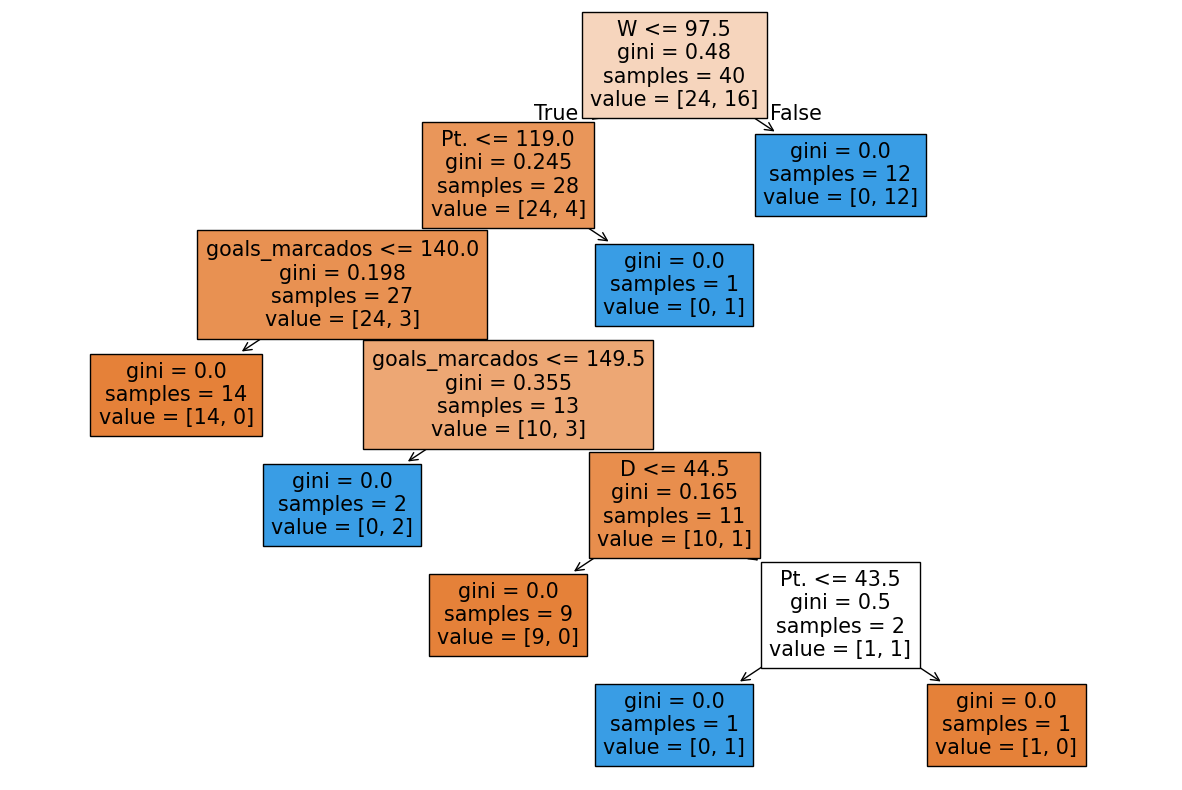

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# ... (seu código para treinar o modelo e fazer as previsões)

# Criando a matriz de confusão
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[7 1]
 [2 0]]


Verdadeiros Negativos (VN): 7 - O modelo previu corretamente que 7 times não seriam campeões.
Falsos Positivos (FP): 1 - O modelo não classificou erroneamente nenhum time como campeão quando na verdade ele não era.
Falsos Negativos (FN): 2 - O modelo classificou erroneamente 2 times como não campeões quando na verdade eles eram campeões.
Verdadeiros Positivos (VP): 0 - O modelo não classificou corretamente nenhum time como campeão.

Alto número de falsos negativos: O maior problema do modelo é que ele está classificando incorretamente muitos times campeões como não campeões. Isso pode ser um problema grave, dependendo da aplicação. Por exemplo, se o objetivo for identificar times com potencial para investir, perder um futuro campeão seria um erro custoso.


In [ ]:
from sklearn.metrics import classification_report

# Supondo que você tenha a matriz de confusão armazenada em 'conf_matrix'
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.00      0.00      0.00         2

    accuracy                           0.70        10
   macro avg       0.39      0.44      0.41        10
weighted avg       0.62      0.70      0.66        10



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ... (pré-processamento dos dados)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.5979 - loss: 52.8704 - val_accuracy: 0.8000 - val_loss: 14.4818
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5875 - loss: 45.7285 - val_accuracy: 0.8000 - val_loss: 11.8301
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5979 - loss: 35.7253 - val_accuracy: 0.8000 - val_loss: 9.2276
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5875 - loss: 28.2085 - val_accuracy: 0.8000 - val_loss: 6.7447
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5979 - loss: 18.6873 - val_accuracy: 0.8000 - val_loss: 4.3514
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5979 - loss: 10.8645 - val_accuracy: 0.8000 - val_loss: 1.8515
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6146 - loss: 3.2259 - val_accuracy: 0.6000 - val_loss: 0.5136
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6854 - loss: 0.7505 - val_accuracy: 0.4000 - val_loss: 3.2984
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


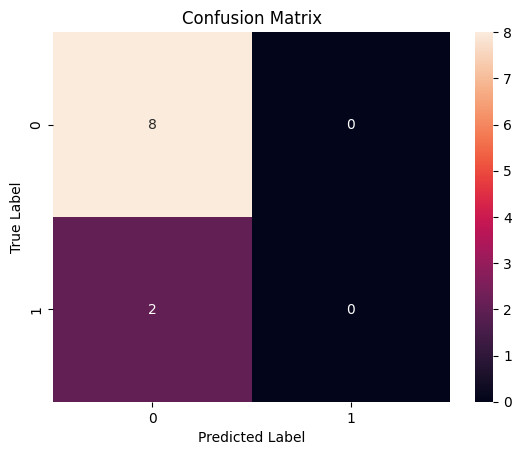

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (seu código para treinar o modelo)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtendo as classes previstas

# Criando a matriz de confusão
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Visualizando a matriz de confusão
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)  # Convertendo probabilidades para classes (ajuste o limiar se necessário)

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Acurácia: 0.2
Precisão: 0.2
Recall: 1.0
F1-score: 0.3333333333333333


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separar features e target
X = td.drop(['Team', 'Champion'], axis=1)  # Excluindo 'Team' e 'Champion'
y = td['Champion']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões
y_pred = rf.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.7


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Acurácia:", accuracy)
print("F1-score:", f1)
print("Recall:", recall)

# Relatório de classificação completo
print(classification_report(y_test, y_pred))

Acurácia: 0.7
F1-score: 0.0
Recall: 0.0
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.00      0.00      0.00         2

    accuracy                           0.70        10
   macro avg       0.39      0.44      0.41        10
weighted avg       0.62      0.70      0.66        10



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Criação do modelo XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,    # Número de árvores
    learning_rate=0.1,   # Taxa de aprendizado
    max_depth=6,         # Profundidade máxima das árvores
    random_state=42      # Para reprodutibilidade
)

# Treinamento do modelo
xgb_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Acurácia: {accuracy * 100:.2f}%')

# Relatório de classificação
print("Relatório de classificação:")
print(classification_report(y_test, y_pred_xgb))

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_xgb))

Acurácia: 80.00%
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.50      0.50      0.50         2

    accuracy                           0.80        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.80      0.80      0.80        10

Matriz de Confusão:
[[7 1]
 [1 1]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ... (seu código anterior)

# Grid Search para otimizar hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 6, 9]
}

grid = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

# Melhor modelo
best_model = grid.best_estimator_

# Previsões e avaliação
y_pred_xgb = best_model.predict(X_test)
# ... (resto do código)

In [ ]:
# ... (seu código anterior com o GridSearch)

# Previsões com o melhor modelo
y_pred_best = best_model.predict(X_test)

# Avaliação do melhor modelo
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Acurácia do melhor modelo: {accuracy_best * 100:.2f}%')
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

# Comparando com o modelo original
print("Melhora na acurácia:", accuracy_best - accuracy)

Acurácia do melhor modelo: 80.00%
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.00      0.00      0.00         2

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10

[[8 0]
 [2 0]]
Melhora na acurácia: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from imblearn.over_sampling import SMOTE

# ... (seu código anterior)

# Aplicando SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Treinando o modelo com os dados balanceados
xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# ... (seu código anterior com SMOTE)

# Treinando o modelo com os dados balanceados
xgb_model.fit(X_train_res, y_train_res)

# Previsões no conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Acurácia: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

Acurácia: 80.00%
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.50      0.50      0.50         2

    accuracy                           0.80        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.80      0.80      0.80        10

[[7 1]
 [1 1]]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# ... seu código de treinamento

# Substitua 'xgb_model' ou 'best_model' pelo nome do seu modelo treinado
modelo = xgb_model  # ou modelo = best_model

# Validação cruzada
scores = cross_val_score(modelo, X, y, cv=5)
print("Acurácia média:", scores.mean())

# Avaliação no conjunto de teste
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia no conjunto de teste:", accuracy)

Acurácia média: 0.78
Acurácia no conjunto de teste: 0.8


Similaridade: O fato de a acurácia média e a acurácia no conjunto de teste serem próximas sugere que o modelo está generalizando bem para novos dados. Isso indica que o modelo não está overfittando os dados de treinamento.